# Question 7 & 8

# acquire

In [1]:
import env

import wrangle
# coding imports
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt

In [2]:
df = wrangle.get_curriculum_data()

Returning saved csv files.


In [3]:
df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java


In [4]:
df = wrangle.prepare_datetime_col(df)

In [5]:
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37


***

Email to analyst:


Hello,


I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
## 7. Which lessons are least accessed?
## 8. Anything else I should be aware of?

In [6]:
df.program_name.value_counts()

full_stack_java    713365
data_science       103412
unknown_program     52893
full_stack_php      30548
front_end               5
Name: program_name, dtype: int64

In [7]:
df.program_name.value_counts()

full_stack_java    713365
data_science       103412
unknown_program     52893
full_stack_php      30548
front_end               5
Name: program_name, dtype: int64

In [8]:
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37


In [9]:
# replace nan values
df.path = df.path.fillna('/')
# create new columns with the Start and end of the endpoints
df[['start', 'end']] = df.path.str.split(pat='/', n=1, expand=True)
# remove pages that are not part of curriculum

df = df[df.end.str.contains('jpeg') != True]

df = df[df.end.str.contains('json') != True]

df = df[df.end.str.contains('jpg') != True]

df = df[df.end.str.contains('appendix') != True]

df = df[df.end.str.contains('Appendix') != True]

df = df[df.end != '/']

df = df[df.end != 'toc']

In [10]:
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,start,end
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03,,
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02,java-ii,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51,jquery,personal-site
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02,jquery,mapbox-api
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09,jquery,ajax/weather-map
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37,anomaly-detection,discrete-probabilistic-methods


In [11]:
df.head(20)

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,start,end
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03,,
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02,java-ii,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals
5,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:41,javascript-i,loops
6,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:46,javascript-i,conditionals
7,javascript-i/functions,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:48,javascript-i,functions
8,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:59,javascript-i,loops
9,javascript-i/functions,4,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:58:26,javascript-i,functions


In [12]:
# removing numbers or special characters from start column 
df.start = df.start.str.lstrip('0123456789.-')
df.start.value_counts()

javascript-i             118723
html-css                  84935
mysql                     82320
jquery                    60862
spring                    57301
                          ...  
npm                           1
_LeastAngleRegression         1
A-clustering                  1
b-clustering                  1
annotations                   1
Name: start, Length: 616, dtype: int64

In [13]:
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,start,end
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03,,
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02,java-ii,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51,jquery,personal-site
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02,jquery,mapbox-api
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09,jquery,ajax/weather-map
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37,anomaly-detection,discrete-probabilistic-methods


In [14]:
# page views per cohort with count
views = df.groupby(['name'])['start'].agg(['count', 'unique'])
views

,count,unique
name,,
Andromeda,24863,"[assets, , toc, html-css, appendix, htmle-css, html, examples, javascript-i, java-i, f..."
Apex,31935,"[, toc, html-css, java-i, java-iii, appendix, jquery, javascript-ii, javascript-i, ele..."
Apollo,5,"[, content]"
Arches,8755,"[, javascript-i, appendix, spring, mysql, examples, jquery, java-iii, slides, assets, ..."
Badlands,93,"[, prework, content, java-i, javascript-i, toc, html-css, javascript-ii]"
Bash,16960,"[, html-css, toc, prework, web-dev-day-two, appendix, jquery, javascript-i, introducti..."
Bayes,23691,"[, sql, storytelling, appendix, fundamentals, advanced-topics, vocabulary.md, regressi..."
Betelgeuse,28454,"[, html-css, toc, spring, appendix, javascript-i, jquery, javascript-ii, java-ii, mysq..."
Ceres,39195,"[, toc, quiz, javascript-i, spring, java-i, java-iii, java-ii, html-css, index.html, m..."


In [15]:
df.program_name.value_counts()

full_stack_java    689957
data_science        90259
unknown_program     50563
full_stack_php      29932
front_end               5
Name: program_name, dtype: int64

In [16]:
#creating a new column
df['program_id'] = df['program_name']
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,start,end,program_id
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03,,,full_stack_php
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02,java-ii,None,full_stack_php
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,full_stack_php
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,full_stack_php
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals,full_stack_java
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51,jquery,personal-site,full_stack_java
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02,jquery,mapbox-api,full_stack_java
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09,jquery,ajax/weather-map,full_stack_java
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37,anomaly-detection,discrete-probabilistic-methods,full_stack_java


In [17]:
df = df.dropna(how='all')
# create column for program names
df.loc[df["program_id"] == "unknown_program", "program_id"] = 0
df.loc[df["program_id"] == "full_stack_java", "program_id"] = 1
df.loc[df["program_id"] == "front_end", "program_id"] = 1
df.loc[df["program_id"] == "full_stack_php", "program_id"] = 1
df.loc[df["program_id"] == "data_science", "program_id"] = 2
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,start,end,program_id
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03,,,1
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02,java-ii,None,1
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,1
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,1
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:41:51,jquery,personal-site,1
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:02,jquery,mapbox-api,1
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:42:09,jquery,ajax/weather-map,1
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,full_stack_java,2021-04-21 16:44:37,anomaly-detection,discrete-probabilistic-methods,1


In [18]:
# page views per cohort with count
views_by_program = df.groupby(['program_id'])['end'].agg(['count', 'unique'])
views_by_program

,count,unique
program_id,,
0,27808,"[, extra-features/form-validation, relationships/joins, tables, databases, relationshi..."
1,574934,"[, None, object-oriented-programming, object_oriented_programming, conditionals, loops..."
2,89686,"[, 1-mysql-overview, bad-charts, cli-git-overview, 1.1-intro-to-data-science, 1.2-data..."


In [19]:
#df.program_id = df.program_id.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860716 entries, 0 to 900222
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   path          860716 non-null  object        
 1   user_id       860716 non-null  int64         
 2   cohort_id     810153 non-null  float64       
 3   ip            860716 non-null  object        
 4   id            810153 non-null  float64       
 5   name          810153 non-null  object        
 6   slack         810153 non-null  object        
 7   start_date    810153 non-null  object        
 8   end_date      810153 non-null  object        
 9   created_at    810153 non-null  object        
 10  updated_at    810153 non-null  object        
 11  deleted_at    0 non-null       float64       
 12  program_name  860716 non-null  object        
 13  timestamp     860716 non-null  datetime64[ns]
 14  start         860716 non-null  object        
 15  end           692

***
***

In [20]:
# check top pages for web development
wd = df[(df.program_id == 1) & (df.end_date)].start.value_counts(ascending=False).to_frame()
wd.head(10)

,start
javascript-i,113826
html-css,81464
mysql,79407
jquery,58306
java-iii,54560
spring,54276
java-ii,52920
java-i,39636
,37504
javascript-ii,37473


In [21]:
# reset index
wd.reset_index(inplace=True)
# rename columns
wd.columns = ('start', 'count')
wd.head()

,start,count
0,javascript-i,113826
1,html-css,81464
2,mysql,79407
3,jquery,58306
4,java-iii,54560


In [22]:
# check the topics that have less than 10 counts
wd[wd['count'] < 10]

,start,count
164,pair-programming,9
165,_intro,9
166,_Present,9
167,single-page.html,9
168,indexes,9
...,...,...
493,gitignore,1
494,wp-login,1
495,quizzes,1
496,strings,1


In [23]:
# remove lower counts from dataframe
wd = wd[wd['count'] > 11]
# get least accessed topics for data science
least_lessons_accessed_wd = wd.tail(15)
least_lessons_accessed_wd

,start,count
123,_DataAcquisition,15
124,sessions-and-cookies,15
125,capstone-workbook,14
126,subqueries,14
127,_Import_Excel,13
128,_Decision_Tree,13
129,setup,13
130,file-io,13
131,where,13
132,_MLModeling,13


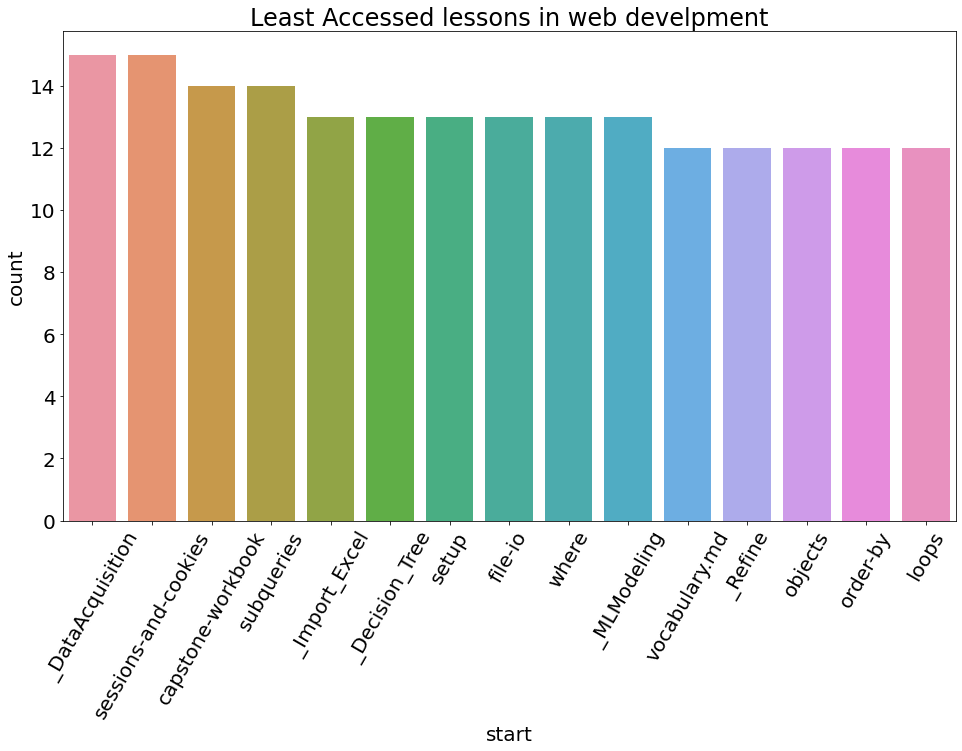

In [24]:
# plot data science least accessed
sns.barplot(data=least_lessons_accessed_wd, x='start', y='count')
plt.title('Least Accessed lessons in web develpment')
plt.xticks(rotation=60);

***
***

In [25]:
# check top pages for data science
ds = df[(df.program_id == 2) & (df.end_date)].start.value_counts(ascending=False).to_frame()
ds.head(10)

,start
sql,13670
classification,11268
python,10455
fundamentals,8979
,8359
regression,7471
stats,6660
appendix,3944
clustering,3635
timeseries,3315


In [26]:
# reset index
ds.reset_index(inplace=True)
# rename columns
ds.columns = ('start', 'count')
ds.head()

,start,count
0,sql,13670
1,classification,11268
2,python,10455
3,fundamentals,8979
4,,8359


In [27]:
# check the topics that have less than 10 counts
ds[ds['count'] < 10]


,start,count
34,environment-setup,9
35,discrete-probabilistic-methods,9
36,mysql,9
37,java-i,8
38,spring,8
39,curie-python-assessment,7
40,regular-expressions,6
41,darden-python-assessment.html,6
42,data-science-pipeline,6
43,Hospital-Distance-Clusters.jpg,5


In [28]:
# remove lower counts from dataframe
ds = ds[ds['count'] > 10]
# get least accessed topics for data science
least_lessons_accessed_ds = ds.tail(15)
least_lessons_accessed_ds

,start,count
14,advanced-topics,1220
15,individual-project,81
16,capstones,63
17,AI-ML-DL-timeline.jpg,58
18,modern-data-scientist.jpg,58
19,html-css,26
20,acquire,18
21,florence-python-assessment.html,16
22,cli,14
23,working-with-time-series-data,14


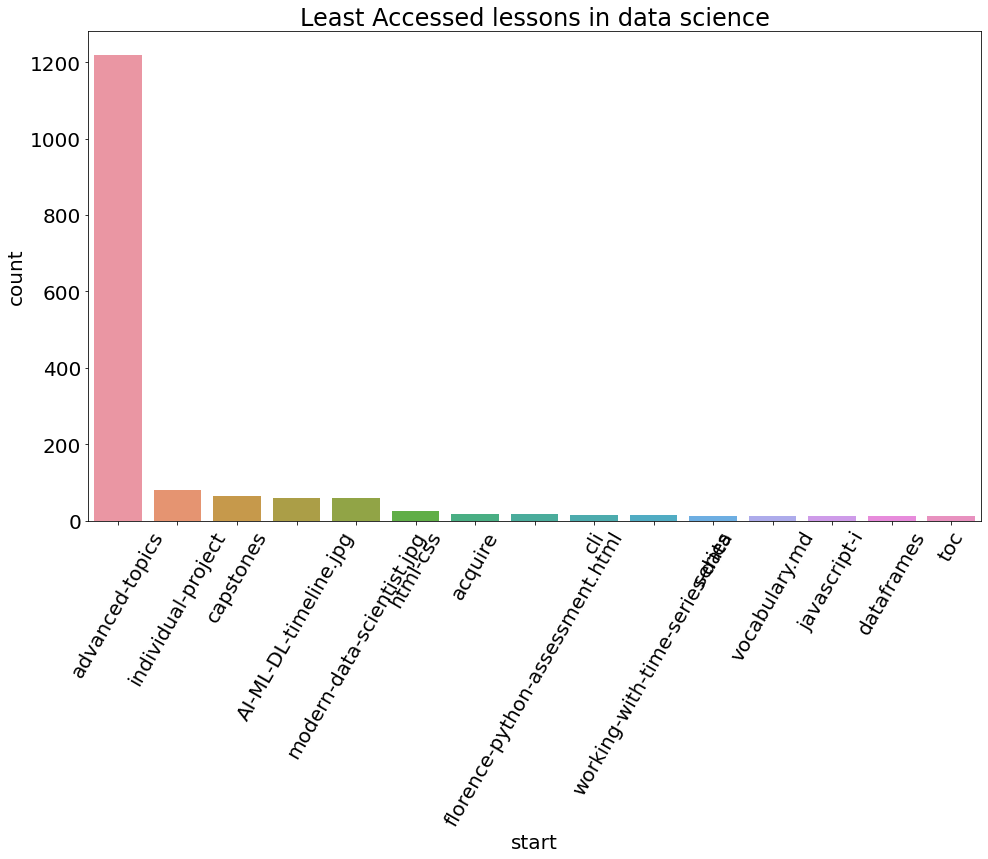

In [29]:
# plot data science least accessed
sns.barplot(data=least_lessons_accessed_ds, x='start', y='count')
plt.title('Least Accessed lessons in data science')
plt.xticks(rotation=60);

***
***

In [30]:
# check top pages for data science
everything = df[(df.program_id == 1) | (df.program_id == 2) & (df.end_date)].start.value_counts(ascending=False).to_frame()
everything.head(10)

,start
javascript-i,113838
html-css,81490
mysql,79416
jquery,58310
java-iii,54564
spring,54284
java-ii,52925
,45863
java-i,39644
javascript-ii,37477


In [31]:
# reset index
everything.reset_index(inplace=True)
# rename columns
everything.columns = ('start', 'count')
everything.head()

,start,count
0,javascript-i,113838
1,html-css,81490
2,mysql,79416
3,jquery,58310
4,java-iii,54564


In [32]:
# check the topics that have less than 10 counts
everything[everything['count'] < 10]

,start,count
178,misleading3_deaths.jpg,9
179,misleading1_baseball.jpg,9
180,_Developing_Data_Products,9
181,discrete-probabilistic-methods,9
182,_Present,9
...,...,...
558,team-setups,1
559,ltc-python,1
560,curie-statistics-assessment,1
561,stats-assessment,1


In [33]:
# remove lower counts from dataframe
everything = everything[everything['count'] > 10]
# get least accessed topics for data science
least_lessons_accessed_everything = everything.tail(20)
least_lessons_accessed_everything

,start,count
144,pandas-overview,12
145,_Refine,12
146,objects,12
147,order-by,12
148,cohorts,11
149,_navigating_the_filesystem,11
150,Classification_AcquireData,11
151,limit,11
152,darden-python-assessment.html,11
153,_file_paths,11


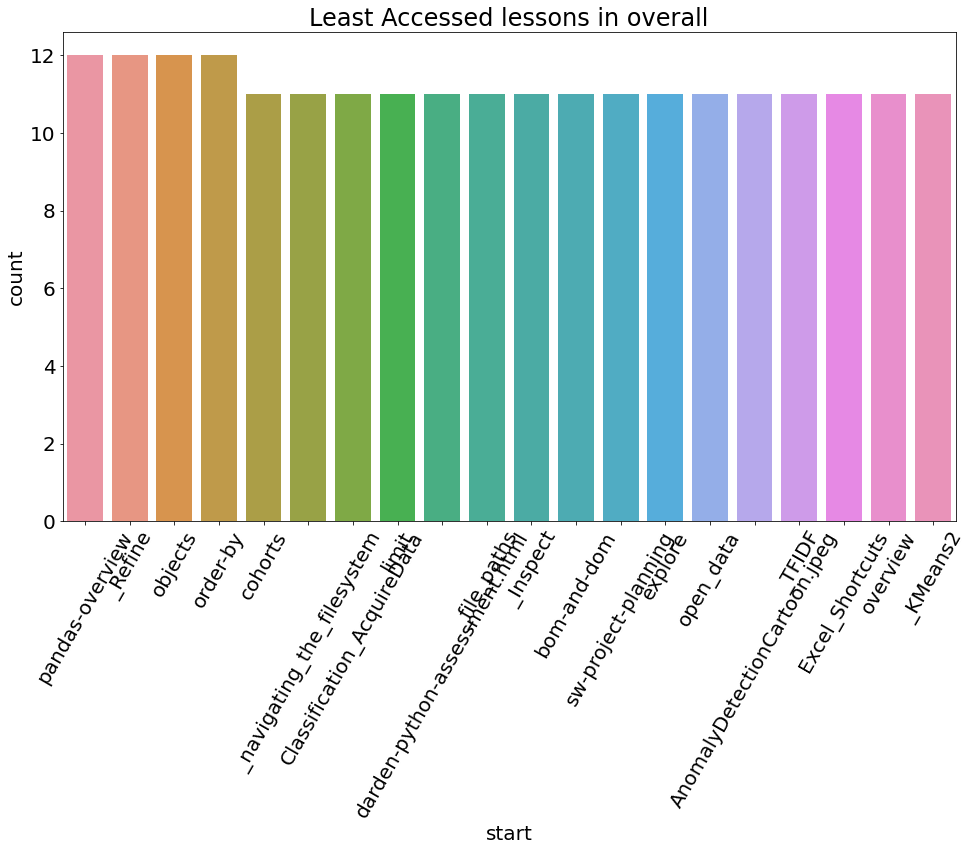

In [34]:
# plot data science least accessed
sns.barplot(data=least_lessons_accessed_everything, x='start', y='count')
plt.title('Least Accessed lessons in overall')
plt.xticks(rotation=60);

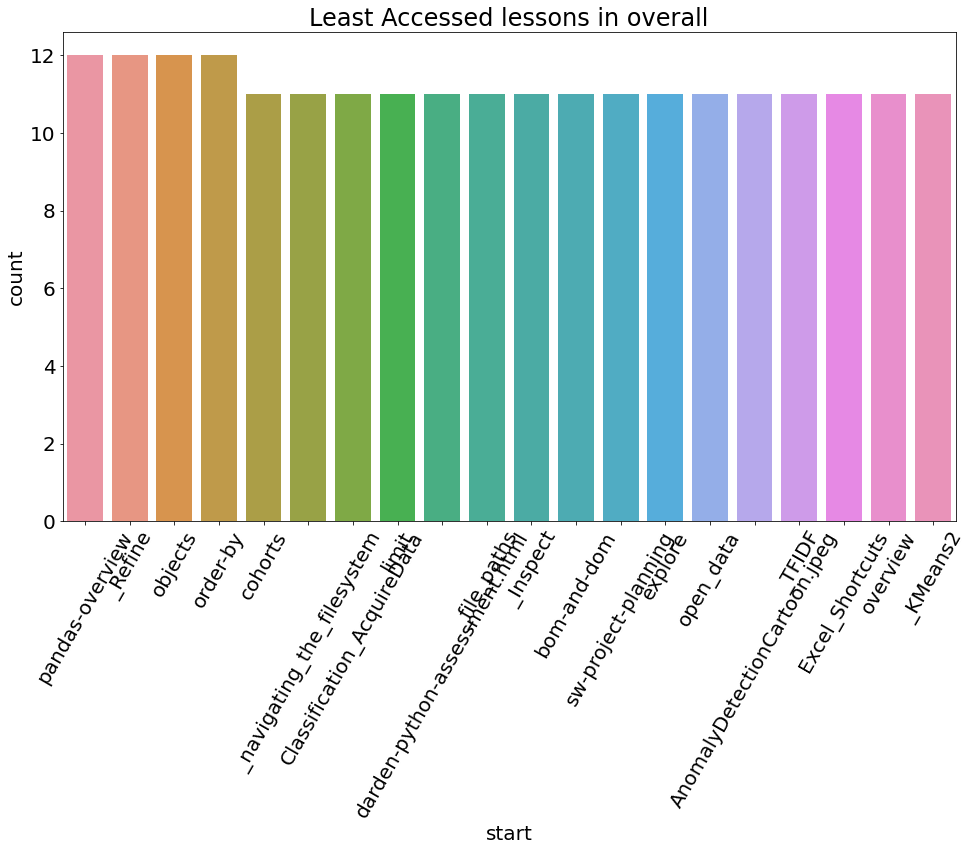

In [35]:
def lessons_least_visited_in_all_data():
    # check top pages for data science
    everything = df[(df.program_id == 1) | (df.program_id == 2) & (df.end_date)].start.value_counts(ascending=False).to_frame()
    # reset index
    everything.reset_index(inplace=True)
    # rename columns
    everything.columns = ('start', 'count')
    # check the topics that have less than 10 counts
    everything[everything['count'] < 10]
    # remove lower counts from dataframe
    everything = everything[everything['count'] > 10]
    # get least accessed topics for data science
    least_lessons_accessed_everything = everything.tail(20)
    # plot data science least accessed
    sns.barplot(data=least_lessons_accessed_everything, x='start', y='count')
    plt.title('Least Accessed lessons in overall')
    plt.xticks(rotation=60);
lessons_least_visited_in_all_data()

# lessons_least_visited_in_all_data Summary
## How the data was prepped:
### How data was filtered:
- Program chosen: Data Science & web development
- Type of data: Only those that had an end date in there file.
- Collumns used: "Start" collumn that was created by copying and splitting "path" column and only grabing             the first part of the string to be able to use that as lesson type.  
- Any data that had less then 10 views was removed for the purpose of sticking to the regular lessons vs. 
    random links
    
## Takeaways:
### Least viwed lessons in Data Science & Web Development:
- Pandas overview
- objects
- navigating the file system
- clasification acquiredata
- file paths darden python assement
- inspect
- bom and dom
- project planning and explore 
- open data
- excel shortcuts
- kmeans2

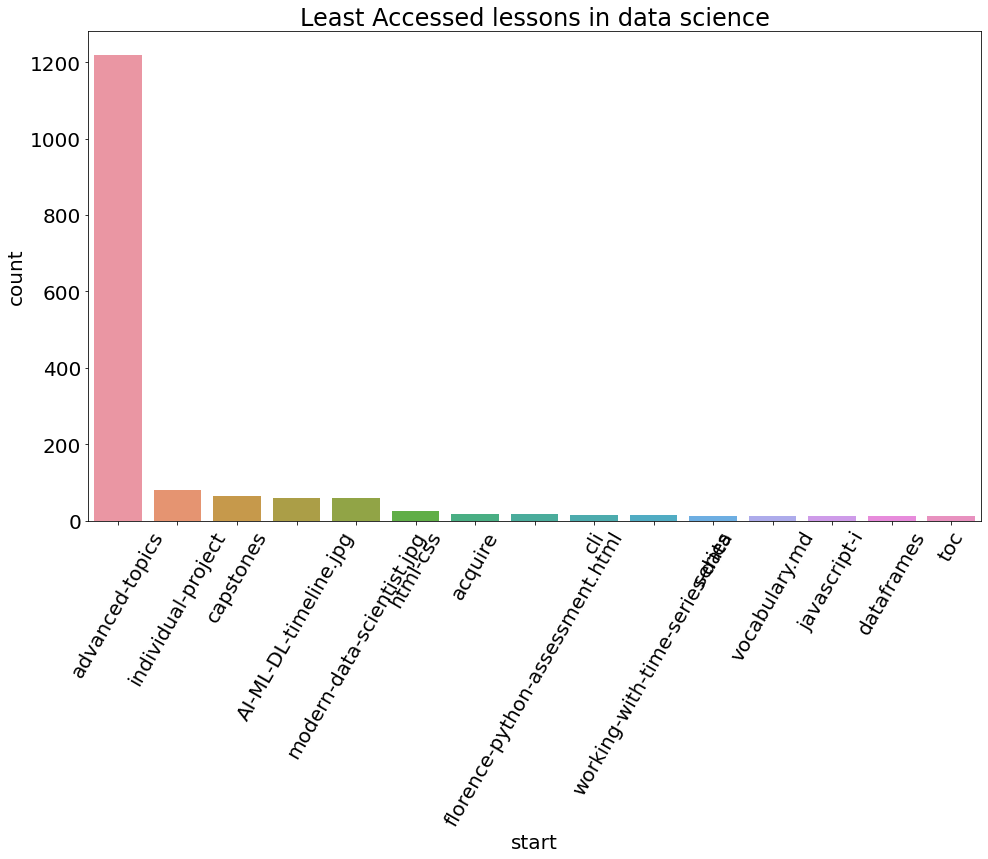

In [36]:
 def lessons_least_visited_in_data_science():
    # check top pages for data science
    ds = df[(df.program_id == 2) & (df.end_date)].start.value_counts(ascending=False).to_frame()
    # reset index
    ds.reset_index(inplace=True)
    # rename columns
    ds.columns = ('start', 'count')
    # check the topics that have less than 10 counts
    ds[ds['count'] < 10]
    # remove lower counts from dataframe
    ds = ds[ds['count'] > 10]
    # get least accessed topics for data science
    # plot data science least accessed
    sns.barplot(data=least_lessons_accessed_ds, x='start', y='count')
    plt.title('Least Accessed lessons in data science')
    plt.xticks(rotation=60);
lessons_least_visited_in_data_science()

# lessons_least_visited_in_data_science Summary
## How the data was prepped:
### How data was filtered:
- Program chosen: Data Science
- Type of data: Only those that had an end date in there file.
- Collumns used: "Start" collumn that was created by copying and splitting "path" column and only grabing             the first part of the string to be able to use that as lesson type.  
- Any data that had less then 10 views was removed for the purpose of sticking to the regular lessons vs. 
    random links
    
## Takeaways:
### Least viwed lessons in Data Science:
- Advance topics
- individual projects
- Capstone
- acquire
- working with time series
- vocab
- javascript
- dataframes 
- toc

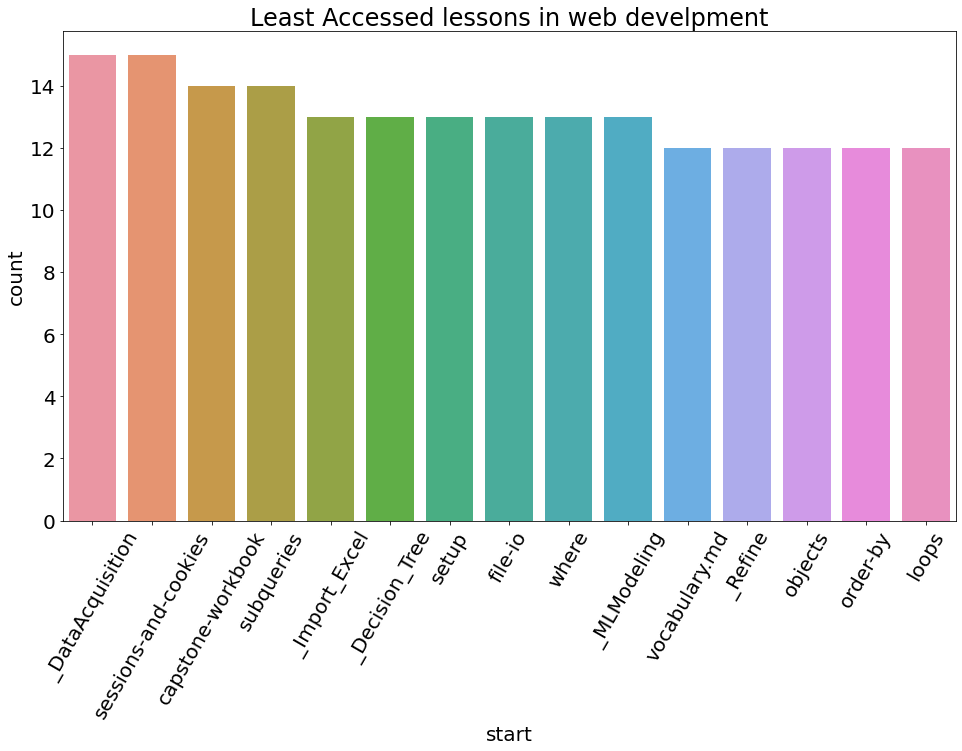

In [37]:
def lessons_least_visited_in_web_development():
    # check top pages for web development
    wd = df[(df.program_id == 1) & (df.end_date)].start.value_counts(ascending=False).to_frame()
    # reset index
    wd.reset_index(inplace=True)
    # rename columns
    wd.columns = ('start', 'count')
    # remove lower counts from dataframe
    wd = wd[wd['count'] > 11]
    # get least accessed topics for data science
    least_lessons_accessed_wd = wd.tail(15)
    # plot data science least accessed
    sns.barplot(data=least_lessons_accessed_wd, x='start', y='count')
    plt.title('Least Accessed lessons in web develpment')
    plt.xticks(rotation=60);
    
lessons_least_visited_in_web_development()

# Lessons_least_visited_in_web_developmen Summary
## How the data was prepped:
### How data was filtered:
- Program chosen: Web Development
- Type of data: Only those that had an end date in there file.
- Collumns used: "Start" collumn that was created by copying and splitting "path" column and only grabing             the first part of the string to be able to use that as lesson type.  
- Any data that had less then 11 views was removed for the purpose of sticking to the regular lessons vs. 
    random links
    
## Takeaways:
### Least viwed lessons in web development:
- Data Acquisition
- Sessions and Cookies
- Capstone Workbook
- Import Excel
- Decision Tree set up
- File io
- Where
- ML Modeling 
- Vocabulary 
- Loops
- Order By
- Objects

***

In [44]:
def lessons_averagely_visited_in_all_programs():
    # check top pages for data science
    overall_average = df[(df.program_id == 1) | (df.program_id == 2) & (df.end_date)].start.value_counts(ascending=False).to_frame()
    # reset index
    overall_average.reset_index(inplace=True)
    # rename columns
    overall_average.columns = ('start', 'count')
    # check the topics that have less than 10 counts
    overall_average[overall_average['count'] <10000] 
    # remove lower counts from dataframe  
    overall = overall_average[overall_average['count'] > 1000]
    return overall
lessons_averagely_visited_in_all_programs()

,start,count
0,javascript-i,113838
1,html-css,81490
2,mysql,79416
3,jquery,58310
4,java-iii,54564
5,spring,54284
6,java-ii,52925
7,,45863
8,java-i,39644
9,javascript-ii,37477


# Lessons_averagely_visited_in_all_programs Summary
## How the data was prepped:
### How data was filtered:
- Program chosen: Web Development & data science 
- Type of data: Only those that had an end date in there file.
- Collumns used: "Start" collumn that was created by copying and splitting "path" column and only grabing             the first part of the string to be able to use that as lesson type.  
- Any data that had less then 1000 views and over 10000 views was removed for the purpose of focusing on the lessons that are looked at on average and not the min or max
    
## Takeaways:
### Averagely viwed lessons in web development & Data Sciece:
- javascript-i
- html-css
- mysql
- jquery
- java-iii
- spring
- java-ii
- java-i
- javascript-ii
- appendix
- toc
- sql
- classification
- examples
- python
- fundamentals
- regression
- content
- stats
- slides
- clustering
- timeseries
- anomaly-detection
- nlp
- storytelling
- capstone
- web-design
- distributed-ml
- index.html
- advanced-topics

# End....